In [111]:
# If we are going to work with data, e.g., text files,
# we need to be able to read data from files:

f = open("text/jabberwocky.txt","r")
data = f.read()  
f.close()
print data
print len(data)

Twas brillig, and the slithy toves
      Did gyre and gimble in the wabe:
All mimsy were the borogoves,
      And the mome raths outgrabe.

Beware the Jabberwock, my son!
      The jaws that bite, the claws that catch!
Beware the Jubjub bird, and shun
      The frumious Bandersnatch!

He took his vorpal sword in hand;
      Long time the manxome foe he sought-
So rested he by the Tumtum tree
      And stood awhile in thought.

And, as in uffish thought he stood,
      The Jabberwock, with eyes of flame,
Came whiffling through the tulgey wood,
      And burbled as it came!

One, two! One, two! And through and through
      The vorpal blade went snicker-snack!
He left it dead, and with its head
      He went galumphing back.

And hast thou slain the Jabberwock?
      Come to my arms, my beamish boy!
O frabjous day! Callooh! Callay!
      He chortled in his joy.

Twas brillig, and the slithy toves
      Did gyre and gimble in the wabe:
All mimsy were the borogoves,
      And the mome rath

In [112]:
# Oops, we have to remove punctuation at the end of words
import re

def depunctuate(word):
    return re.sub(r"(.*)[\"\.,:;!?]", r"\1", word)
    

In [113]:
#  We should also map words to lower case 
# (though this will not matter for word-length frequencies)

def normalize(word):
    return depunctuate(word).lower() 
    
print normalize("Foo!")

foo


In [114]:
def words(text):
    words = text.split()
    return map(normalize, words)

words(data)

['twas',
 'brillig',
 'and',
 'the',
 'slithy',
 'toves',
 'did',
 'gyre',
 'and',
 'gimble',
 'in',
 'the',
 'wabe',
 'all',
 'mimsy',
 'were',
 'the',
 'borogoves',
 'and',
 'the',
 'mome',
 'raths',
 'outgrabe',
 'beware',
 'the',
 'jabberwock',
 'my',
 'son',
 'the',
 'jaws',
 'that',
 'bite',
 'the',
 'claws',
 'that',
 'catch',
 'beware',
 'the',
 'jubjub',
 'bird',
 'and',
 'shun',
 'the',
 'frumious',
 'bandersnatch',
 'he',
 'took',
 'his',
 'vorpal',
 'sword',
 'in',
 'hand',
 'long',
 'time',
 'the',
 'manxome',
 'foe',
 'he',
 'sought-',
 'so',
 'rested',
 'he',
 'by',
 'the',
 'tumtum',
 'tree',
 'and',
 'stood',
 'awhile',
 'in',
 'thought',
 'and',
 'as',
 'in',
 'uffish',
 'thought',
 'he',
 'stood',
 'the',
 'jabberwock',
 'with',
 'eyes',
 'of',
 'flame',
 'came',
 'whiffling',
 'through',
 'the',
 'tulgey',
 'wood',
 'and',
 'burbled',
 'as',
 'it',
 'came',
 'one',
 'two',
 'one',
 'two',
 'and',
 'through',
 'and',
 'through',
 'the',
 'vorpal',
 'blade',
 'went',


In [115]:
# We can now count words, and, more interestingly, analyze word frequencies and word-length statistics:

def word_count(data):
    return len(words(data))

def word_lengths(data):
    return map(len, words(data))

# Our little statistics package
from statistics import mean, stdev

def word_stats(data):
    lengths = word_lengths(data)
    return [mean(lengths), stdev(lengths)]

print "Word count", word_count(data)

print "Word lengths", word_lengths(data)

print "Word length stats", word_stats(data)

Word count 166
Word lengths [4, 7, 3, 3, 6, 5, 3, 4, 3, 6, 2, 3, 4, 3, 5, 4, 3, 9, 3, 3, 4, 5, 8, 6, 3, 10, 2, 3, 3, 4, 4, 4, 3, 5, 4, 5, 6, 3, 6, 4, 3, 4, 3, 8, 12, 2, 4, 3, 6, 5, 2, 4, 4, 4, 3, 7, 3, 2, 7, 2, 6, 2, 2, 3, 6, 4, 3, 5, 6, 2, 7, 3, 2, 2, 6, 7, 2, 5, 3, 10, 4, 4, 2, 5, 4, 9, 7, 3, 6, 4, 3, 7, 2, 2, 4, 3, 3, 3, 3, 3, 7, 3, 7, 3, 6, 5, 4, 13, 2, 4, 2, 4, 3, 4, 3, 4, 2, 4, 10, 4, 3, 4, 4, 5, 3, 10, 4, 2, 2, 4, 2, 7, 3, 1, 8, 3, 7, 6, 2, 8, 2, 3, 3, 4, 7, 3, 3, 6, 5, 3, 4, 3, 6, 2, 3, 4, 3, 5, 4, 3, 9, 3, 3, 4, 5, 8]
Word length stats [4.34, 2.14]


In [116]:
# Aha!  We can modify entries as well as adding them.
# This gives us clue of how to populate a dictionary programmatically.
# First, we devise an 'add_entry' function:

def add_entry(dictionary, key):
    if key in dictionary:
        dictionary[key] = dictionary[key] + 1
    else:
        dictionary[key] = 1


In [117]:
# OK, it is working, but we are still doing too much work by hand.
# Let's automate things.

def frequencies(data):
    freq = dict()
    for i in range(0,21):
        freq[i] = 0
    for datum in data:
        add_entry(freq, datum)
    return freq


In [118]:
def rescale(dictionary):
    total = float(sum(dictionary.values()))
    new_dictionary = dict()
    for key in dictionary.keys():
        new_dictionary[key] = dictionary[key]/total
    return new_dictionary



In [119]:
rfw = rescale(frequencies(word_lengths(data))); rfw

{0: 0.0,
 1: 0.006024096385542169,
 2: 0.14457831325301204,
 3: 0.29518072289156627,
 4: 0.22289156626506024,
 5: 0.08433734939759036,
 6: 0.09036144578313253,
 7: 0.07228915662650602,
 8: 0.030120481927710843,
 9: 0.018072289156626505,
 10: 0.024096385542168676,
 11: 0.0,
 12: 0.006024096385542169,
 13: 0.006024096385542169,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0}

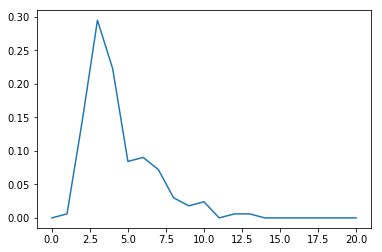

In [121]:
import matplotlib.pyplot as plt
import numpy as np

yvalues = rfw.values()
xvalues = [i for i in range(0,21)]  # [1,2, ..., 11]

plt.plot(xvalues, yvalues)
plt.savefig("jabberwocky.png")
plt.show()



In [122]:
jabb = yvalues; print jabb;  print len(jabb)

[0.0, 0.006024096385542169, 0.14457831325301204, 0.29518072289156627, 0.22289156626506024, 0.08433734939759036, 0.09036144578313253, 0.07228915662650602, 0.030120481927710843, 0.018072289156626505, 0.024096385542168676, 0.0, 0.006024096385542169, 0.006024096385542169, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
21


In [123]:
gett = [0.0,
 0.029411764705882353,
 0.17647058823529413,
 0.23949579831932774,
 0.20168067226890757,
 0.12605042016806722,
 0.08823529411764706,
 0.058823529411764705,
 0.025210084033613446,
 0.04201680672268908,
 0.008403361344537815,
 0.004201680672268907,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [124]:
import math

def distance(u, v):
    d = 0
    for i in range(0, len(u)):
        delta = u[i] - v[i]
        d = d + delta*delta 
    return math.sqrt(d)

distance([1,0], [0,1])

1.4142135623730951

In [125]:
distance(gett, jabb)

0.0893005796422794

In [138]:
def norm(u):
    sum = 0
    for element in u:
        sum = sum + element*element
    return math.sqrt(sum)

ww = [1,1]
norm(ww)

1.4142135623730951

In [127]:
print norm(gett); print norm(jabb)

0.399579611024
0.424431685634


In [128]:
def scalarproduct(a, u):
    return map(lambda x: a*x, u)
    
scalarproduct(2, [1,2,3])

[2, 4, 6]

In [139]:
def unit_vector(u):
    return scalarproduct(1/norm(u), u)

print unit_vector([1,0]); print (unit_vector([1,1]))

[1.0, 0.0]
[0.7071067811865475, 0.7071067811865475]


In [130]:
def normalized_distance(u,v):
    return distance(normalize(u), normalize(v))

normalized_distance(gett, jabb)

0.20827822691415854

In [131]:
def dot(u,v):
    sum = 0
    for i in range(0, len(u)):
        sum = sum + u[i]*v[i]
    return sum

dot([1,2], [-1, 1])

1

In [132]:
import numpy as np

def angle(u,v):
    uu = normalize(u)
    vv = normalize(v)
    return (180/np.pi)*np.arccos(dot(uu,vv))

In [133]:
print angle([1,0], [1,0]); print angle([0,1], [1,0])

0.0
90.0


In [134]:
angle(gett, jabb)

11.955138961487133